# Proyek Analisis Data: [ Bike-Sharing-Dataset ]
- **Nama:** [ Muhamad Fahmi ]
- **Email:** [ 	mc246d5y2423@student.devacademy.id ]
- **ID Dicoding:** [ muhamad_fahmii ]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana perbandingan jumlah peminjam untuk setiap harinya ?
- Pertanyaan 2 : Bagaimana perbandingan jumlah pengunjung untuk setiap weathersit?
- pertanyaan 3 : Bagaimana perbandingan jumlah pengunjung untuk setiap season?

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Semua Packages/Library yang Digunakan

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [39]:
# Read the CSV file from the URL
raw_df = pd.read_csv('/content/drive/MyDrive/dataset/day.csv')

# Display the first few rows of the DataFrame
raw_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.34,0.36,0.81,0.16,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.36,0.35,0.70,0.25,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.20,0.19,0.44,0.25,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.20,0.21,0.59,0.16,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.23,0.23,0.44,0.19,82,1518,1600


### Assessing Data

Menilai Tabel data

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
print("Jumlah duplikasi: ", raw_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
raw_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

mengecek duplikasi

In [ ]:
raw_df.duplicated().sum()

0

mengecek missing value

In [ ]:
raw_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


merubah tipe data dteday

In [ ]:
raw_df['dteday'] = pd.to_datetime(raw_df['dteday'])

## Exploratory Data Analysis (EDA)

In [ ]:
raw_df.groupby(by=["holiday", "weekday"]).agg({
    "temp": "mean",
    "hum": "mean",
    "windspeed":"mean",
    "cnt": ["mean","min","max"]
})

temp       hum windspeed          cnt            
                     mean      mean      mean         mean   min   max
holiday weekday                                                       
0       0        0.483628  0.627659  0.188530  4228.828571   605  8227
        1        0.495684  0.639526  0.189197  4398.866667    22  7525
        2        0.506350  0.640927  0.192050  4544.621359   683  7767
        3        0.501863  0.646403  0.188249  4520.825243   441  8173
        4        0.507237  0.610376  0.193201  4720.343137   431  7804
        5        0.497750  0.614834  0.184739  4718.588235  1167  8362
        6        0.482038  0.619560  0.196588  4550.542857   627  8714
1       1        0.480041  0.625878  0.199654  3973.666667  1000  6370
        2        0.291304  0.734783  0.168726  1013.000000  1013  1013
        3        0.789167  0.538750  0.134950  7403.000000  7403  7403
        4        0.356666  0.564792  0.110087  1960.000000  1495  2425
        5        0.385417  0.558750  0.270525  3247.000000  3126  3368

#Explore data raw_df berdasarkan hari

In [ ]:
pivot_holiday = raw_df.groupby(by=["holiday"]).agg({
    "cnt": "mean"
}).reset_index()
pivot_weekday = raw_df.groupby(by=["weekday"]).agg({
    "cnt":"mean"
}).reset_index()
pivot_workingday = raw_df.groupby(by=["workingday"]).agg({
    "cnt": "mean"
}).reset_index()
pivot_holiday

,holiday,cnt
0,0,4527.104225
1,1,3735.000000


Menampilkan pivot tabel

In [ ]:
pd.options.display.float_format = '{:.0f}'.format
print("Rata-rata jumlah peminjaman sepeda terhadap hari libur :")
print(pivot_holiday.to_string(index=False))
print("\n===============================================\n")
print("Rata-rata jumlah peminjaman sepeda terhadap hari :")
print(pivot_weekday.to_string(index=False))
print("\n===============================================\n")
print("Rata-rata jumlah peminjaman sepeda terhadap hari kerja :")
print(pivot_workingday.to_string(index=False))

Rata-rata jumlah peminjaman sepeda terhadap hari libur :
 holiday  cnt
       0 4527
       1 3735


Rata-rata jumlah peminjaman sepeda terhadap hari :
 weekday  cnt
       0 4229
       1 4338
       2 4511
       3 4549
       4 4667
       5 4690
       6 4551


Rata-rata jumlah peminjaman sepeda terhadap hari kerja :
 workingday  cnt
          0 4330
          1 4585


#Explore data raw_df berdasarkan season

In [ ]:
raw_df['season'] = raw_df['season'].map({1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'})

In [ ]:
pivot_season = raw_df.groupby(by=["season"]).agg({
    "cnt": "mean"
}).reset_index()

# Menampilkan pivot tabel
pd.options.display.float_format = '{:.0f}'.format
print("Rata-rata jumlah peminjaman sepeda terhadap hari libur :")
print(pivot_season.to_string(index=False))

Rata-rata jumlah peminjaman sepeda terhadap hari libur :
season  cnt
Dingin 4728
 Gugur 5644
 Panas 4992
  Semi 2604


#Explore data raw_df berdasarkan weathersit

In [ ]:
raw_df['weathersit'] =raw_df['weathersit'].map({1: 'Cerah', 2: 'Berkabut', 3: 'Hujan Ringan', 4: 'Hujan Lebat'})

In [ ]:
pivot_weathersit = raw_df.groupby(by=["weathersit"]).agg({
    "cnt": "mean"
}).reset_index()

# Menampilkan pivot tabel
pd.options.display.float_format = '{:.2f}'.format
print("Rata-rata jumlah peminjaman sepeda terhadap hari libur :")
print(pivot_weathersit.to_string(index=False))

Rata-rata jumlah peminjaman sepeda terhadap hari libur :
  weathersit     cnt
    Berkabut 4035.86
       Cerah 4876.79
Hujan Ringan 1803.29


#Explore data raw_df berdasarkan humidity

In [ ]:
hum_df = raw_df[['hum','cnt']]
hum_df

,hum,cnt
0,0.81,985
1,0.70,801
2,0.44,1349
3,0.59,1562
4,0.44,1600
...,...,...
726,0.65,2114
727,0.59,3095
728,0.75,1341
729,0.48,1796


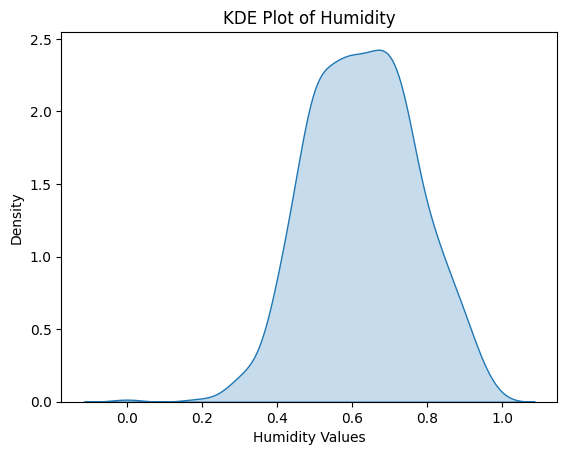

In [ ]:
sns.kdeplot(data=hum_df['hum'], fill=True)
plt.title('KDE Plot of Humidity')
plt.xlabel('Humidity Values')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Bagaimana perbandingan jumlah peminjam untuk setiap harinya?

In [ ]:
day_df= raw_df.groupby(by=["weekday"]).agg({
    "cnt": "mean"
}).reset_index()
day_df

,weekday,cnt
0,0,4228.83
1,1,4338.12
2,2,4510.66
3,3,4548.54
4,4,4667.26
5,5,4690.29
6,6,4550.54


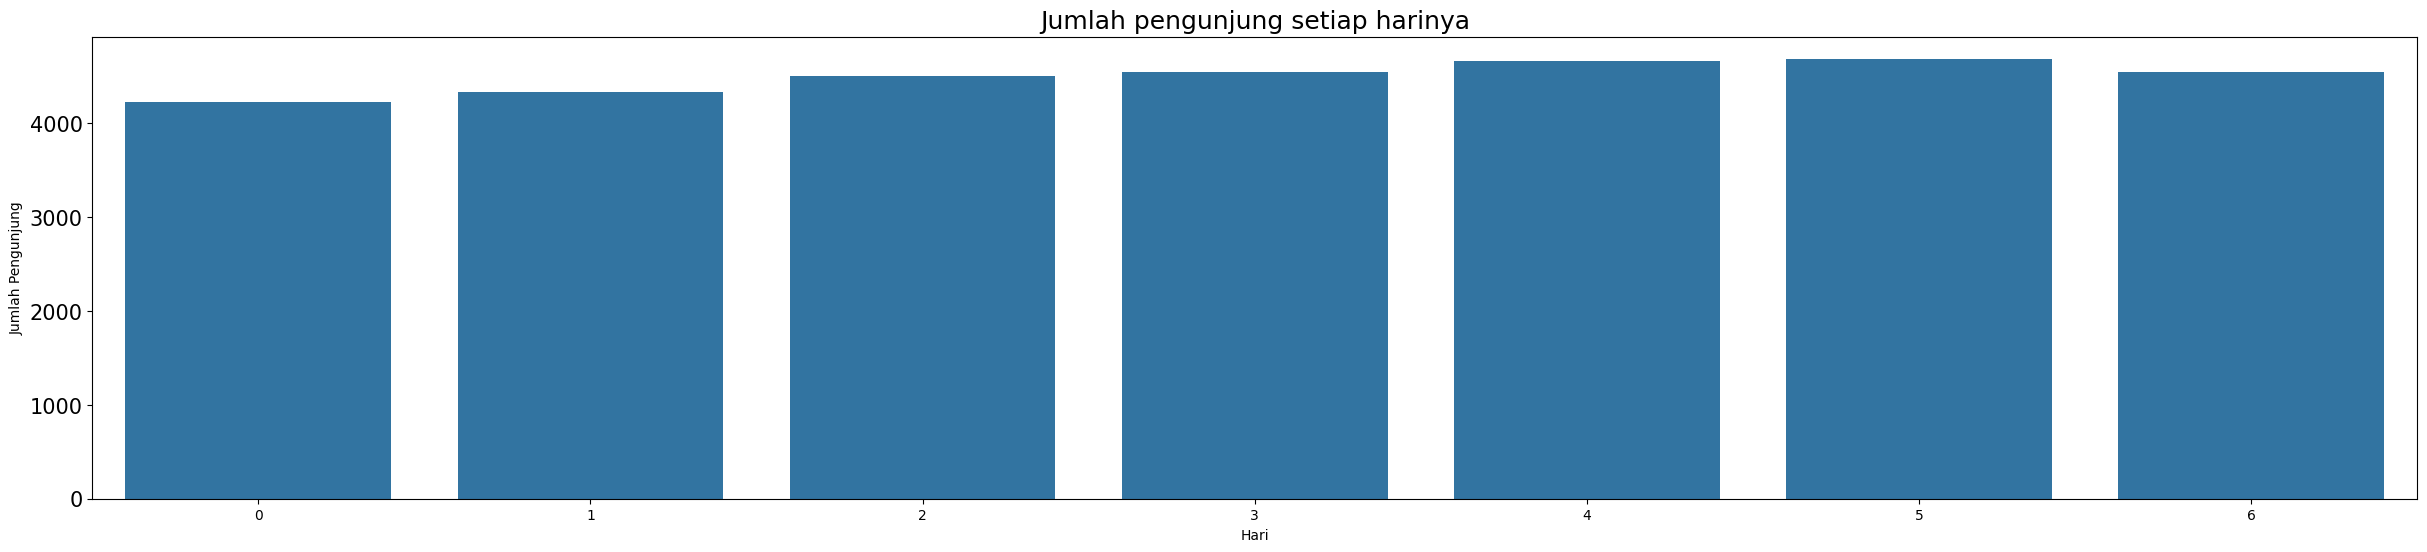

In [ ]:
fig, ax = plt.subplots(nrows=1, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(x='weekday', y='cnt', data=pivot_weekday.sort_values(by='cnt', ascending=False))
ax.set_ylabel("Jumlah Pengunjung")
ax.set_xlabel("Hari")
ax.set_title("Jumlah pengunjung setiap harinya", loc="center", fontsize=18)
ax.tick_params(axis ='y', labelsize=15)

plt.show()

### Pertanyaan 2 : Bagaimana perbandingan jumlah pengunjung untuk setiap weathersit?

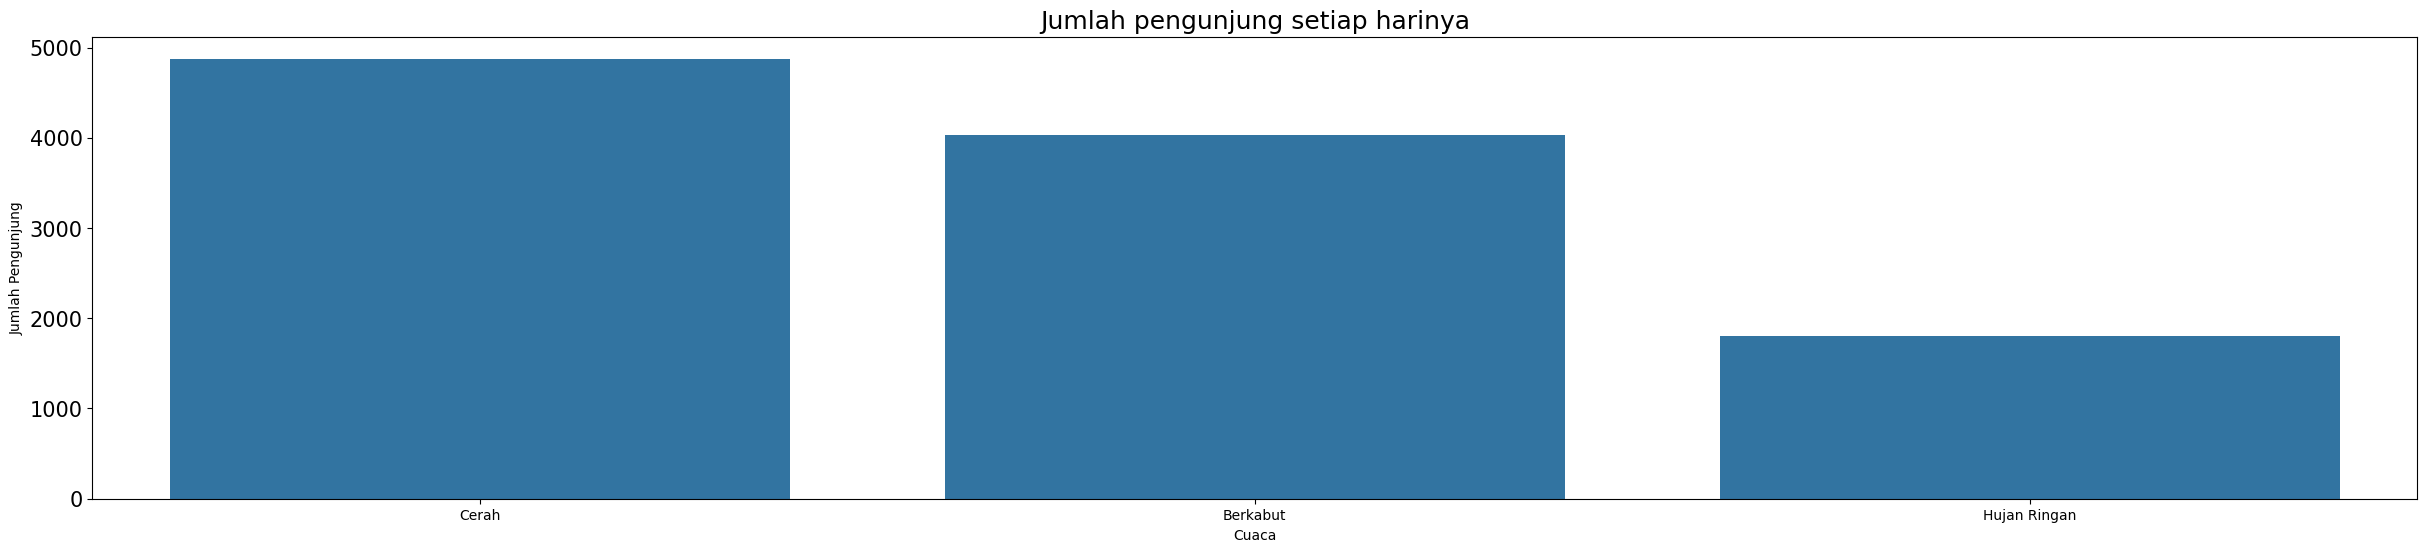

In [ ]:
fig, ax = plt.subplots(nrows=1, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(x='weathersit', y='cnt', data=pivot_weathersit.sort_values(by='cnt', ascending=False))
ax.set_ylabel("Jumlah Pengunjung")
ax.set_xlabel("Cuaca")
ax.set_title("Jumlah pengunjung setiap harinya", loc="center", fontsize=18)
ax.tick_params(axis ='y', labelsize=15)

plt.show()

### Pertanyaan 3 : Bagaimana perbandingan jumlah pengunjung untuk setiap season?

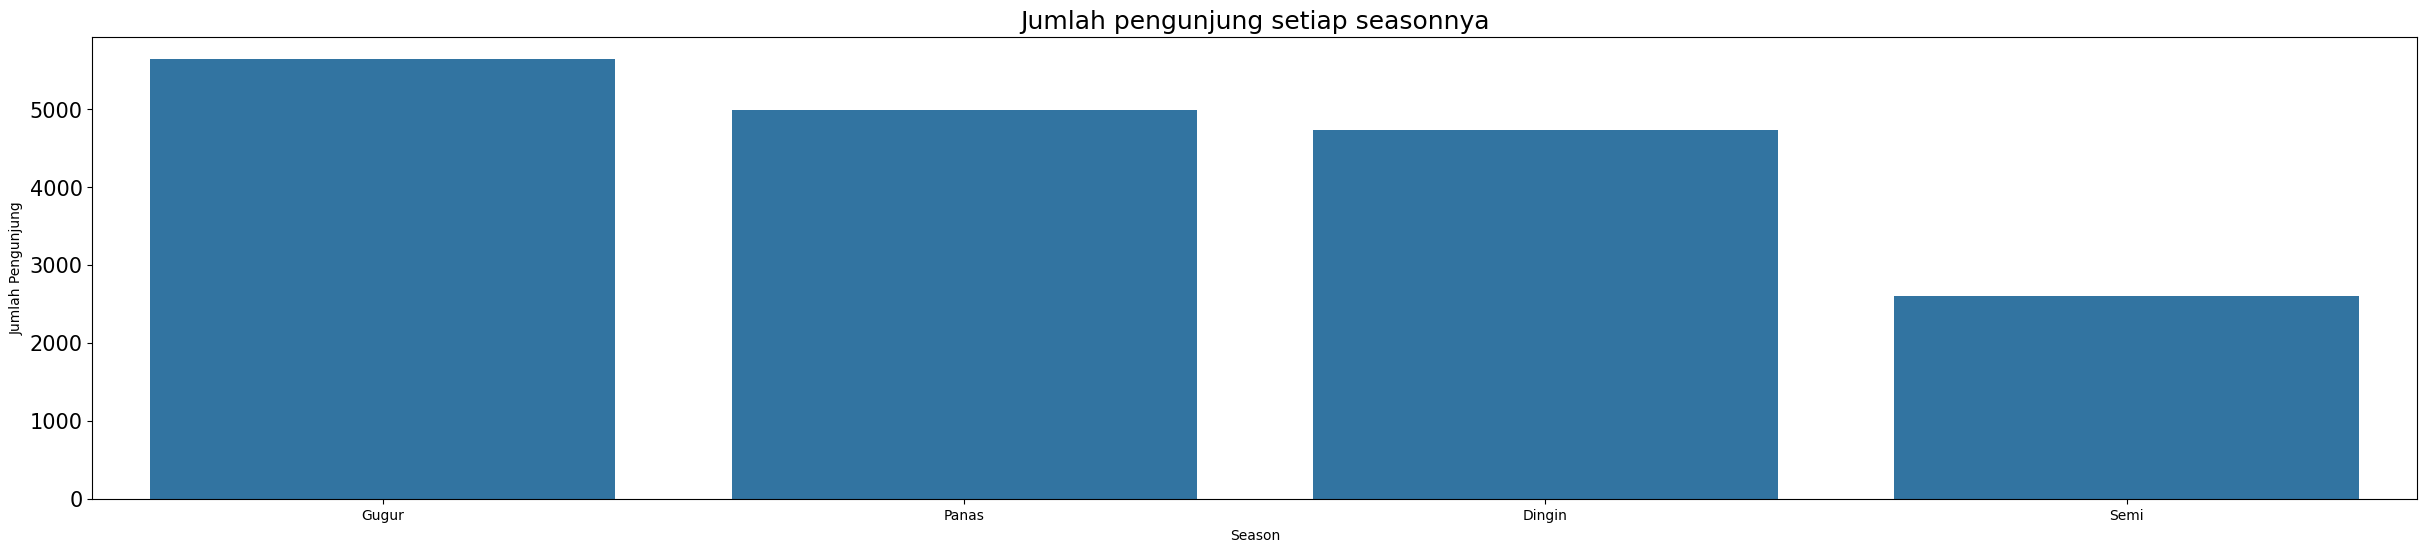

In [ ]:
fig, ax = plt.subplots(nrows=1, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(x='season', y='cnt', data=pivot_season.sort_values(by='cnt', ascending=False))
ax.set_ylabel("Jumlah Pengunjung")
ax.set_xlabel("Season")
ax.set_title("Jumlah pengunjung setiap seasonnya", loc="center", fontsize=18)
ax.tick_params(axis ='y', labelsize=15)

plt.show()

- Conclution pertanyaan 1

  Grafik menunjukkan tidak adanya perubahan yang cukup jauh antara hari. Jika diperhatikan, terdapat sedikit peningkatan dari hari 0 (minggu) ke hari 5 (jumat), lalu kembali turun pada hari 6 (sabtu).

- Conclution pertanyaan 2

  Peminjaman paling tinggi terjadi ketika musim gugur, lalu musim panas, musim dingin, dan paling rendah ada pada musim semi. Pada musim gugur, cuaca sudah lebih stabil dan cukup hangat sehingga cocook untuk bersepeda. Sedangkan pada musim semi, cuaca masih tidak stabil sehingga orang cenderung tidak meminjam sepeda.

- Conclution pertanyaan 3

  Terdapat perbedaan yang cukup jauh antara setiap cuaca. Dimana rata-rata peminjaman paling tinggi ada pada cuac ke-1. Keterangan untuk setiap nilai adalah sebagai berikut.

  1: Clear, Few clouds, Partly cloudy, Partly cloudy

  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

- Conclution pertanyaan 4

  Peminjaman menurun jauh ketika nilai humidity cukup rendah. Ketika humidity diatas 0.4 maka peminjaman mulai banyak dilakukan

In [42]:
#Baca dataset dari Google Drive
file_path = '/content/drive/My Drive/dataset/day.csv'
all_df = pd.read_csv(file_path)

output_path = '/content/drive/My Drive/dataset/all_data.csv'
all_df.to_csv(output_path, index=False)

print("Dataset berhasil disimpan ke Google Drive.")


Dataset berhasil disimpan ke Google Drive.
